In [1]:
import fsps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.interpolate import interp1d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [116]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
AGE =np.arange(.1,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
ultau=np.append([0],10**(np.array(tau[1:])-9))

In [81]:
def Stellar_mass(t,ultau):
    t_mass=np.zeros(t.size)
    s_mass=np.zeros(t.size)    
    sp = fsps.StellarPopulation(imf_type=0,tpagb_norm_type=0,zcontinuous=1,
                            logzsol=np.log10(0.019/0.019), sfh=4,tau=ultau)
    for i in range(t.size):
        sp.get_spectrum(tage=t[i],peraa=True)
        t_mass[i]=sp.formed_mass
        s_mass[i]=sp.stellar_mass
        
    return s_mass,t_mass

In [85]:
def SFH(AGE,TAU):
    return AGE*np.exp(-AGE/TAU)

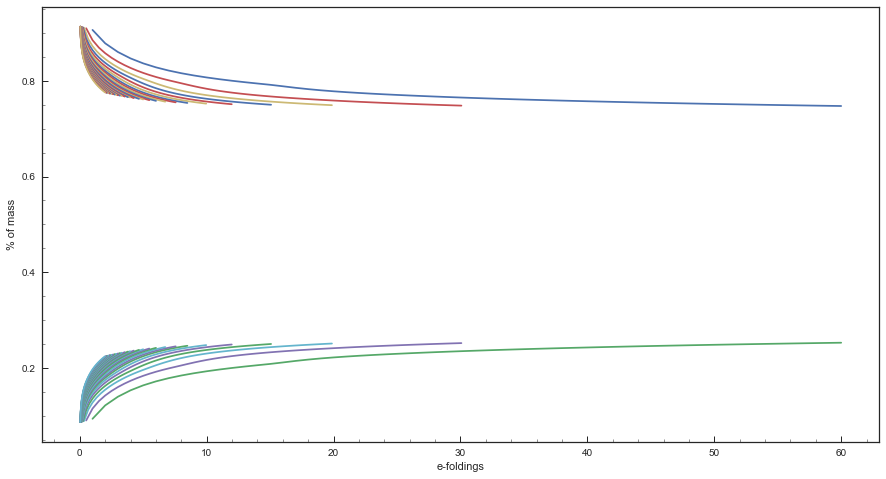

In [118]:
smass_grid=np.zeros([ultau.size -1, AGE.size])
tmass_grid=np.zeros([ultau.size -1, AGE.size])


plt.figure(figsize=[15,8])

for i in range(ultau.size-1):
    smass,tmass=Stellar_mass(AGE,ultau[i+1])
    smass_grid[i]=smass
    tmass_grid[i]=tmass
    plt.plot(AGE/ultau[i+1],smass)
    plt.plot(AGE/ultau[i+1],tmass-smass)
plt.ylabel('% of mass')
plt.xlabel('e-foldings')
plt.minorticks_on()
plt.legend()

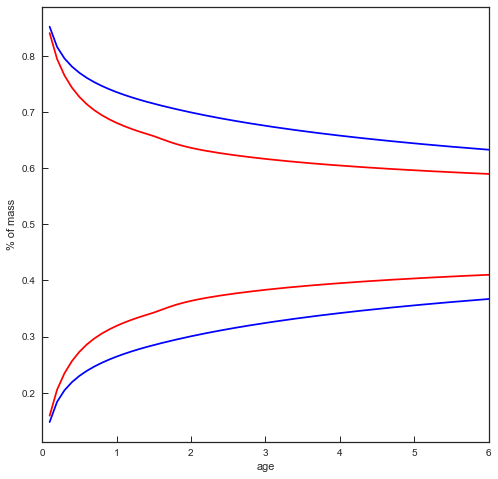

In [67]:
smass,tmass=Stellar_mass(np.arange(.1,14,.1),3)
smass2,tmass2=Stellar_mass(np.arange(.1,14,.1),.1)

plt.figure(figsize=[8,8])
plt.plot(np.arange(.1,14,.1),smass,'b')
plt.plot(np.arange(.1,14,.1),smass2,'r')
plt.plot(np.arange(.1,14,.1),tmass-smass,'b')
plt.plot(np.arange(.1,14,.1),tmass2-smass2,'r')
plt.ylabel('% of mass')
plt.xlabel('age')
plt.xlim(0,6)
plt.legend()

In [65]:
smass2

array([ 0.84080264,  0.79456063,  0.76512314,  0.74354767,  0.72698964,
        0.71392646,  0.70335839,  0.69461294,  0.68721094,  0.68080188,
        0.67515209,  0.67009528,  0.66550257,  0.66128047,  0.65715934,
        0.6524221 ,  0.64752321,  0.64320599,  0.6395164 ,  0.63634427,
        0.63354952,  0.63105841,  0.62878928,  0.62670883,  0.62478234,
        0.62297373,  0.62126223,  0.61963136,  0.61807235,  0.61659061,
        0.61517847,  0.61382483,  0.61253093,  0.61129623,  0.61011122,
        0.60896822,  0.60786747,  0.60680689,  0.60578099,  0.6047854 ,
        0.60382062,  0.60288848,  0.60198514,  0.60110676,  0.60025076,
        0.59942075,  0.59861898,  0.59784133,  0.59708389,  0.59634409,
        0.59562116,  0.59491675,  0.59422958,  0.59355766,  0.59289949,
        0.59225409,  0.5916219 ,  0.59100802,  0.59041167,  0.58982969,
        0.58925968,  0.58870021,  0.58815043,  0.58761404,  0.58710358,
        0.58661611,  0.58614486,  0.58568515,  0.58523439,  0.58

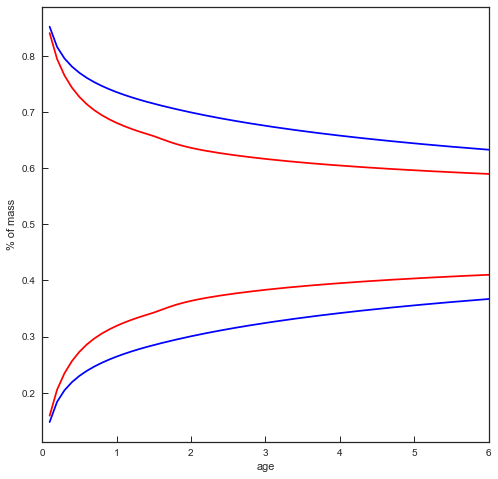

In [67]:
smass,tmass=Stellar_mass(np.arange(.1,14,.1),3)
smass2,tmass2=Stellar_mass(np.arange(.1,14,.1),.1)

plt.figure(figsize=[8,8])
plt.plot(np.arange(.1,14,.1),smass,'b')
plt.plot(np.arange(.1,14,.1),smass2,'r')
plt.plot(np.arange(.1,14,.1),tmass-smass,'b')
plt.plot(np.arange(.1,14,.1),tmass2-smass2,'r')
plt.ylabel('% of mass')
plt.xlabel('age')
plt.xlim(0,6)
plt.legend()

In [63]:
smass,tmass=Stellar_mass(np.arange(.1,6,.1),3)

plt.figure(figsize=[8,8])
plt.plot(np.arange(.1,6,.1),smass,'b')
plt.plot(np.arange(.1,6,.1),tmass-smass,'b')
plt.ylabel('% of mass')
plt.xlabel('age')
plt.xlim(0,6)
plt.legend()

In [124]:
mass = np.zeros(AGE.size)

for i in range(AGE.size):
    sfh = SFH(np.append(0,AGE[0:i+1]),ultau[5])
    mass[i] = np.trapz(sfh,np.append(0,AGE[0:i+1]))

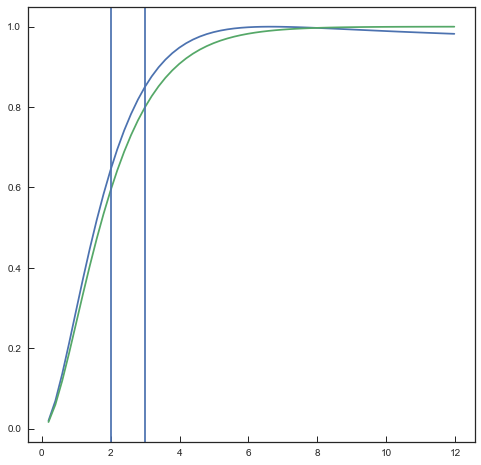

In [125]:
plt.figure(figsize=[8,8])
plt.plot(AGE/ultau[5],mass*smass_grid[4]/max(mass*smass_grid[4]))
plt.plot(AGE/ultau[5],mass/max(mass))

plt.axvline(2)
plt.axvline(3)

In [91]:
smass_grid[1]

array([ 0.83656818,  0.82831255,  0.82159782,  0.81601559,  0.8112716 ,
        0.80714912,  0.80350391,  0.80023295,  0.7972558 ,  0.79451413,
        0.79183337,  0.78874493,  0.78554676,  0.78272549,  0.78031205,
        0.77823493,  0.77640307,  0.7747681 ,  0.77327724,  0.77190868,
        0.77064001,  0.76944808,  0.7683195 ,  0.76724368,  0.766215  ,
        0.76523693,  0.7643045 ,  0.76341051,  0.7625554 ,  0.76173865,
        0.76095424,  0.7601973 ,  0.75946726,  0.7587626 ,  0.75808018,
        0.75741751,  0.75677509,  0.75615421,  0.75555241,  0.75496716,
        0.75439682,  0.75384422,  0.75331116,  0.75279464,  0.75229182,
        0.75180085,  0.75132103,  0.75085306,  0.75039615,  0.74994914,
        0.74951116,  0.74908162,  0.74866079,  0.74825181,  0.74785418,
        0.74746592])

In [94]:
ultau

array([  0.00000000e+00,   1.00000000e-09,   1.00000000e-01,
         1.99526231e-01,   3.01995172e-01,   3.98107171e-01,
         5.01187234e-01,   6.02559586e-01,   7.07945784e-01,
         7.94328235e-01,   8.91250938e-01,   1.00000000e+00,
         1.09647820e+00,   1.20226443e+00,   1.28824955e+00,
         1.41253754e+00,   1.51356125e+00,   1.58489319e+00,
         1.69824365e+00,   1.81970086e+00,   1.90546072e+00,
         1.99526231e+00,   2.08929613e+00,   2.18776162e+00,
         2.29086765e+00,   2.39883292e+00,   2.51188643e+00,
         2.57039578e+00,   2.69153480e+00,   2.81838293e+00,
         2.88403150e+00,   3.01995172e+00])

In [119]:
AGE[0:1]

array([ 0.1])